---
#CHURN: The Employee Turnover Conundrum
###*Developing a strategic plan for retention*


---
---

   Discovering the underlying issues
   >Pattern identification using:

    *   Decision Trees
    *   Random Forests


Details as of import 2/26/2024
---
---
**(cleaned data github.com/MelAGndy/master/blob/master/churn/employee_stats)*
# *   14,999 Employees sampled
>Salary rates:
>>*   low:  7,316
>>*   medium:  6,446
>>*   high:  1,237
>Job descriptions:
>>*   Accounting:  767
>>*   HR:  739
>>*   Marketing:  858
>>*   Management:  630
>>*   Product Manager:  902
>>*   R&D:  787
>>*   Sales:  4,140
>>*   Support:  2,229
>>*   Technical:  2,720

# Imports

In [1]:
# @title
!pip install pandas-profiling
#[notebook]
# !jupyter nbextension enable --py widgetsnbextension

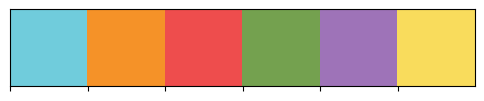

In [2]:
# @title
import os
import warnings
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image
import pandas as pd
#import pandas_profiling
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz # display the tree within a Jupyter notebook
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from ipywidgets import interactive, IntSlider, FloatSlider, interact
import ipywidgets
from IPython.display import Image
from subprocess import call
import matplotlib.image as mpimg
from matplotlib.colors import ListedColormap

kats_palette = ListedColormap(['#70ccdc', '#f59228', '#ee4d4d','#74a14f','#9e73b8','#f9dc5c'])
import seaborn as sns
#html color codes
kats = ['#70ccdc', '#f59228', '#ee4d4d','#74a14f','#9e73b8','#f9dc5c']
sns.palplot(sns.color_palette(kats))


warnings.simplefilter("ignore")
%matplotlib inline

In [3]:
# @title
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# @title
employee_eval = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/churn_ Desicion_Tree_Random_Forest/employee_stats.csv')

In [7]:
# @title
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
# @title
# Define a dictionary mapping salary categories to colors
salary_colors = {
    'low': kats[2],   # Assigning color for 'low' salary
    'medium': kats[1],# Assigning color for 'medium' salary
    'high': kats[0]   # Assigning color for 'high' salary
}

In [9]:
# @title
employee_eval.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,Sales,low
1,0.80,0.86,5,262,6,0,1,0,Sales,medium
2,0.11,0.88,7,272,4,0,1,0,Sales,medium
3,0.72,0.87,5,223,5,0,1,0,Sales,low
4,0.37,0.52,2,159,3,0,1,0,Sales,low


In [10]:
# @title
# # @title salary vs satisfaction_level
# figsize = (12, 1.2 * len(employee_eval['salary'].unique()))
# plt.figure(figsize=figsize)

# # Use the custom color palette directly in the violinplot function
# sns.violinplot(employee_eval, x='satisfaction_level', y='salary', inner='box', palette=kats)
# sns.despine(top=True, right=True, bottom=True, left=True)

# # Show the plot
# plt.show()

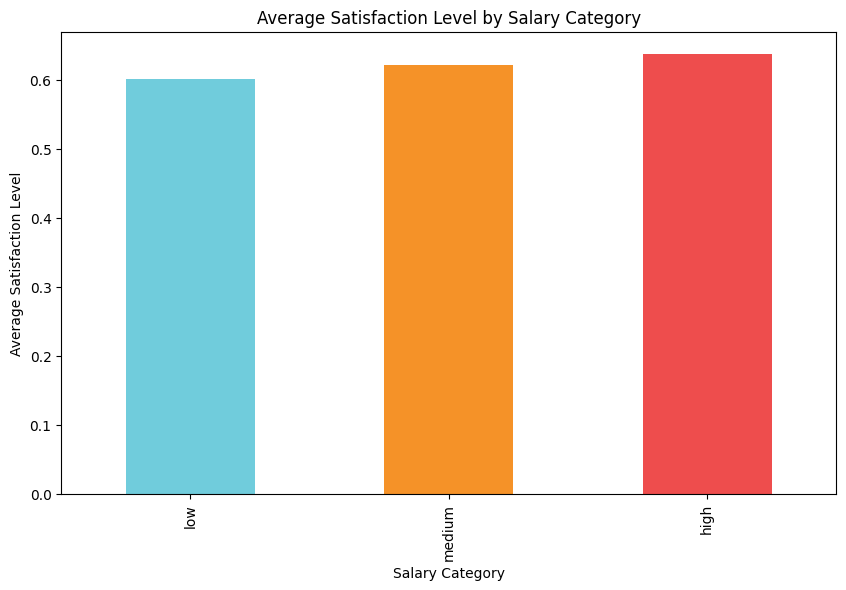

In [11]:
# @title
# Define the order of salary categories and corresponding colors
salary_order = ['low', 'medium', 'high']
colors = ['#70ccdc', '#f59228', '#ee4d4d']  # Assuming 'low', 'medium', 'high' respectively

# Calculate the average satisfaction level for each salary category
avg_satisfaction = employee_eval.groupby('salary')['satisfaction_level'].mean().loc[salary_order]

# Plot the bar graph with the specified order and colors
plt.figure(figsize=(10, 6))
avg_satisfaction.plot(kind='bar', color=colors)

# Set labels and title
plt.xlabel('Salary Category')
plt.ylabel('Average Satisfaction Level')
plt.title('Average Satisfaction Level by Salary Category')

# Show the plot
plt.show()

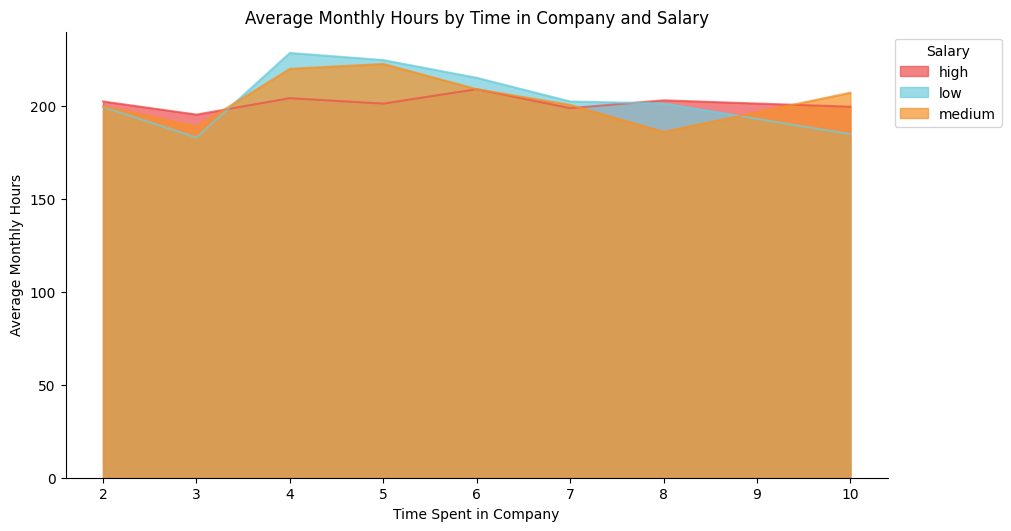

In [12]:
# @title
# Define salary categories corresponding colors
colors = ['#ee4d4d','#70ccdc', '#f59228', ]  # after inspection 'high' ,'low', 'medium'
# Stacked area chart
fig, ax = plt.subplots(figsize=(10, 5.2), constrained_layout=True)

# Group by salary and time spent in company, then calculate the average monthly hours
df_grouped = employee_eval.groupby(['time_spend_company', 'salary'])['average_montly_hours'].mean().unstack()

# Plot the stacked area chart using specified colors
df_grouped.plot(kind='area', ax=ax, stacked=False, alpha=0.7, color=colors)

# Add legend outside the plot
ax.legend(title='Salary', bbox_to_anchor=(1, 1), loc='upper left')

# Set axis labels and title
ax.set_xlabel('Time Spent in Company')
ax.set_ylabel('Average Monthly Hours')
ax.set_title('Average Monthly Hours by Time in Company and Salary')

# Remove spines
sns.despine()

# Show the plot
plt.show()

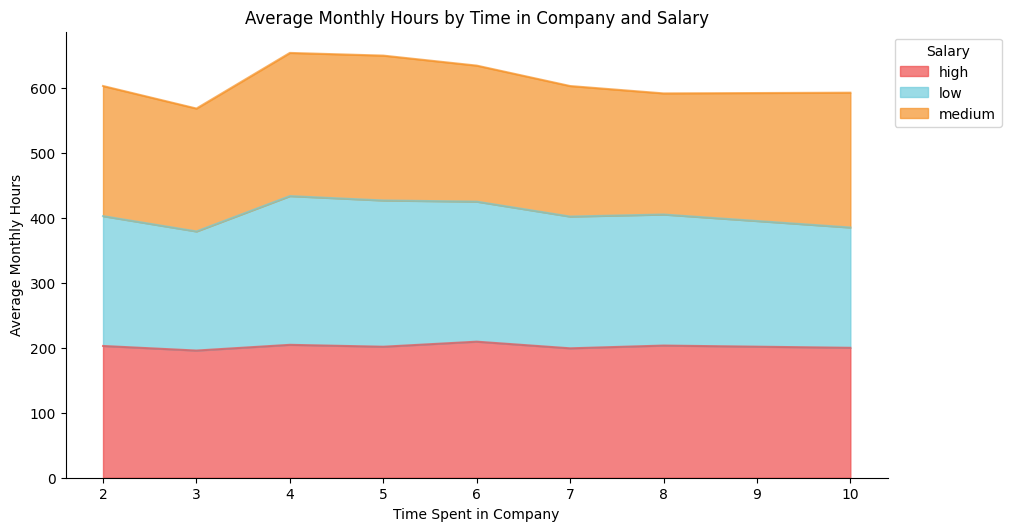

In [13]:
# @title
# Define salary categories corresponding colors
colors = ['#ee4d4d','#70ccdc', '#f59228', ]  # after inspection 'high' ,'low', 'medium'
# Stacked area chart
fig, ax = plt.subplots(figsize=(10, 5.2), constrained_layout=True)

# Group by salary and time spent in company, then calculate the average monthly hours
df_grouped = employee_eval.groupby(['time_spend_company', 'salary'])['average_montly_hours'].mean().unstack()

# Plot the stacked area chart using specified colors
df_grouped.plot(kind='area', ax=ax, stacked=True, alpha=0.7, color=colors)

# Add legend outside the plot
ax.legend(title='Salary', bbox_to_anchor=(1, 1), loc='upper left')

# Set axis labels and title
ax.set_xlabel('Time Spent in Company')
ax.set_ylabel('Average Monthly Hours')
ax.set_title('Average Monthly Hours by Time in Company and Salary')

# Remove spines
sns.despine()

# Show the plot
plt.show()

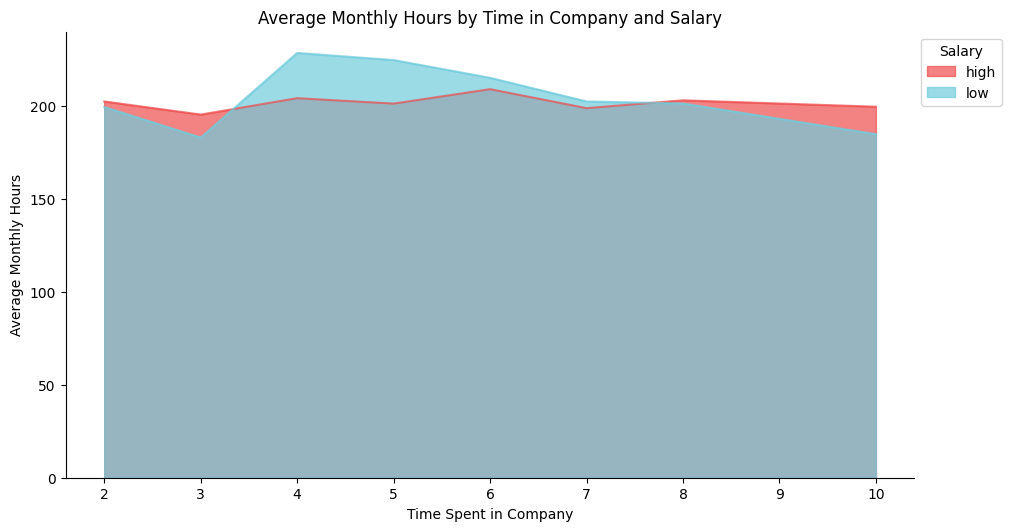

In [14]:
# @title
# Define the  salary categories corresponding colors

colors = ['#ee4d4d','#70ccdc']  #  'high' 'low' on a check

# Stacked area chart
fig, ax = plt.subplots(figsize=(10, 5.2), constrained_layout=True)

# Filter out the rows with 'low' salary
employee_eval_filtered = employee_eval[employee_eval['salary'] != 'medium']

# Group by salary and time spent in company, then calculate the average monthly hours
df_grouped = employee_eval_filtered.groupby(['time_spend_company', 'salary'])['average_montly_hours'].mean().unstack()

# Plot the stacked area chart using specified colors
df_grouped.plot(kind='area', ax=ax, stacked=False, alpha=0.7, color=colors)

# Add legend outside the plot
ax.legend(title='Salary', bbox_to_anchor=(1, 1), loc='upper left')

# Set axis labels and title
ax.set_xlabel('Time Spent in Company')
ax.set_ylabel('Average Monthly Hours')
ax.set_title('Average Monthly Hours by Time in Company and Salary')

# Remove spines
sns.despine()

# Show the plot
plt.show()


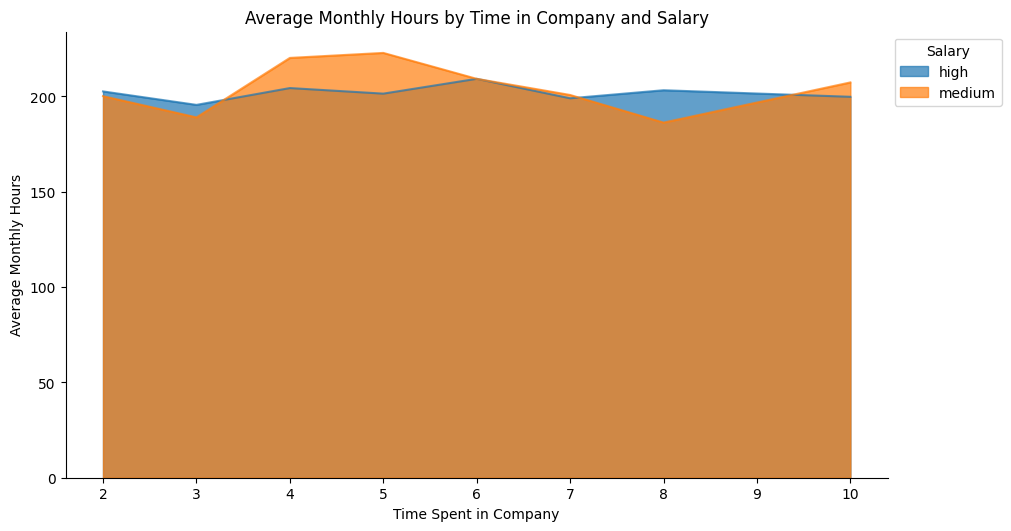

In [15]:
# @title
# Stacked area chart
fig, ax = plt.subplots(figsize=(10, 5.2), constrained_layout=True)

# Filter out the rows with 'low' salary
employee_eval_filtered = employee_eval[employee_eval['salary'] != 'low']

# Group by salary and time spent in company, then calculate the average monthly hours
df_grouped = employee_eval_filtered.groupby(['time_spend_company', 'salary'])['average_montly_hours'].mean().unstack()

# Plot the stacked area chart using default colors
df_grouped.plot(kind='area', ax=ax, stacked=False, alpha=0.7)

# Add legend outside the plot
ax.legend(title='Salary', bbox_to_anchor=(1, 1), loc='upper left')

# Set axis labels and title
ax.set_xlabel('Time Spent in Company')
ax.set_ylabel('Average Monthly Hours')
ax.set_title('Average Monthly Hours by Time in Company and Salary')

# Remove spines
sns.despine()

# Show the plot
plt.show()

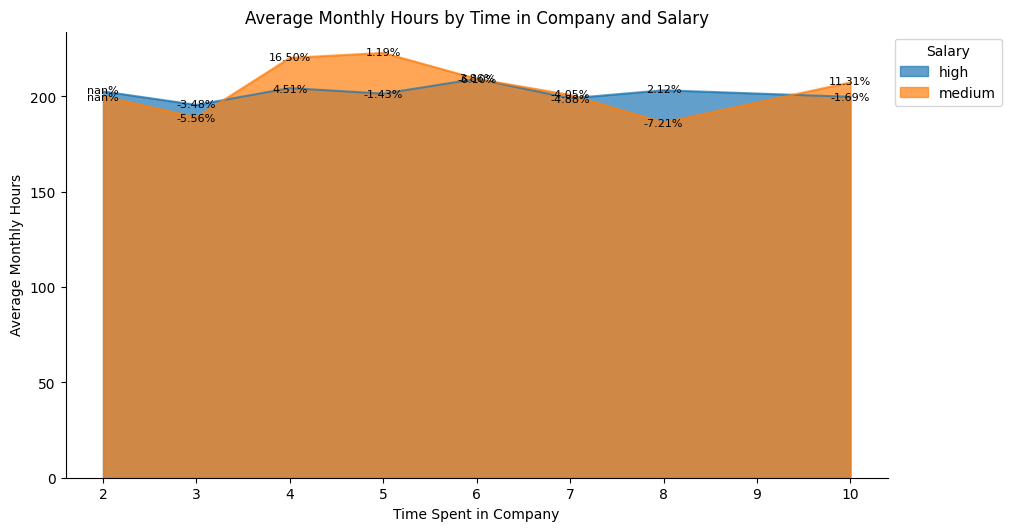

In [16]:
# @title
# Stacked area chart
fig, ax = plt.subplots(figsize=(10, 5.2), constrained_layout=True)

# Filter out the rows with 'low' salary
employee_eval_filtered = employee_eval[employee_eval['salary'] != 'low']

# Group by salary and time spent in company, then calculate the average monthly hours
df_grouped = employee_eval_filtered.groupby(['time_spend_company', 'salary'])['average_montly_hours'].mean().unstack()

# Plot the area chart with stacked=False
df_grouped.plot(kind='area', ax=ax, stacked=False, alpha=0.7)

# Calculate the percentage increase or decrease in average monthly hours over time
percent_change = df_grouped.pct_change() * 100

# Add labels for percentage change, highest, and lowest amounts at each point
for time in percent_change.index:
    for salary in percent_change.columns:
        change = percent_change.loc[time, salary]
        highest = df_grouped.loc[time].idxmax()
        lowest = df_grouped.loc[time].idxmin()
        # Adjust y-offset to avoid overlapping labels
        offset = 0.5 if salary == highest else -0.5 if salary == lowest else 0
        ax.text(time, df_grouped.loc[time, salary] + offset, f'{change:.2f}%', fontsize=8, ha='center', va='center')

# Add legend outside the plot
ax.legend(title='Salary', bbox_to_anchor=(1, 1), loc='upper left')

# Set axis labels and title
ax.set_xlabel('Time Spent in Company')
ax.set_ylabel('Average Monthly Hours')
ax.set_title('Average Monthly Hours by Time in Company and Salary')

# Remove spines
sns.despine()

# Show the plot
plt.show()

In [17]:
# @title

print(type(kats_palette))


<class 'matplotlib.colors.ListedColormap'>


issues and issues on sort and color... fixed then broke

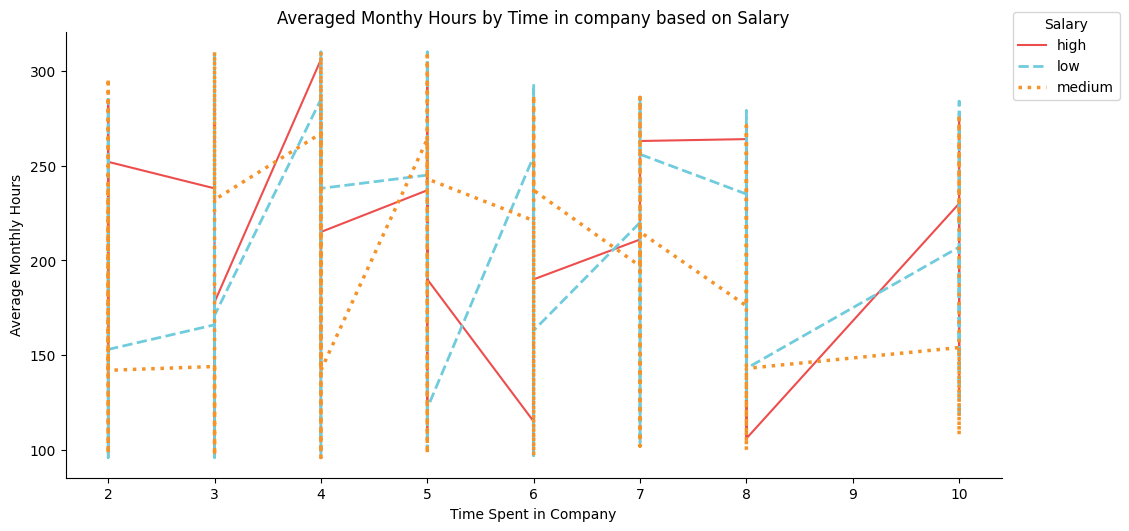

In [18]:
# @title
# Define salary categories corresponding colors
colors = ['#ee4d4d','#70ccdc', '#f59228', ]  # after inspection 'high' ,'low', 'medium'
# Function to plot series with varied size and shape
def _plot_series_with_varied_style(series, series_name, palette, ax, line_width, line_style):
    xs = series['time_spend_company']
    ys = series['average_montly_hours']
    ax.plot(xs, ys, label=series_name, color=palette, linewidth=line_width, linestyle=line_style)

# Create a constrained layout figure
fig, ax = plt.subplots(figsize=(10, 5.2), constrained_layout=True)

# Sort the dataframe by 'time_spend_company'
df_sorted = employee_eval.sort_values('time_spend_company', ascending=True)

# Convert the colormap to a list of colors
colors2 = list(colors)

# Plot each series with varied size and shape
line_styles = ['solid', 'dashed', 'dotted']  # Define line styles
for i, (series_name, series) in enumerate(df_sorted.groupby('salary')):
    line_width = 1.5 + i * 0.5  # Vary line width
    line_style = line_styles[i % len(line_styles)]  # Cycle through line styles
    _plot_series_with_varied_style(series, series_name, colors2[i], ax, line_width, line_style)

# Add legend outside the loop
fig.legend(title='Salary', bbox_to_anchor=(1, 1), loc='upper left')

# Remove spines
sns.despine()

# Set axis labels
plt.xlabel('Time Spent in Company')
plt.ylabel('Average Monthly Hours')
plt.title('Averaged Monthy Hours by Time in company based on Salary')

# Show plot
plt.show()


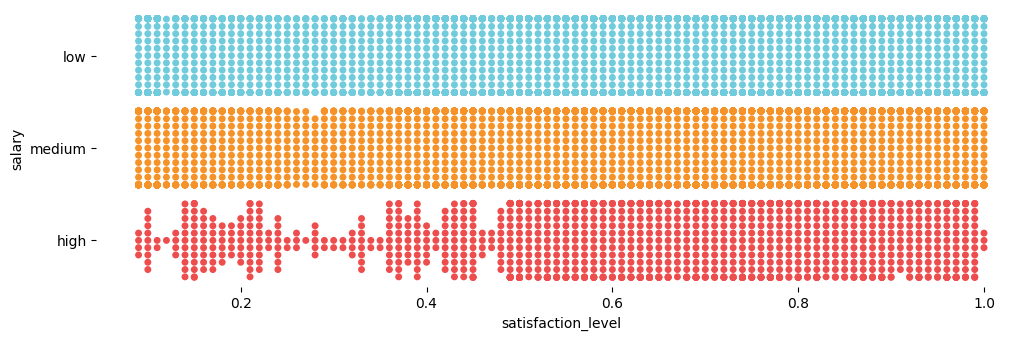

In [19]:
# @title
figsize = (12, 1.2 * len(employee_eval['salary'].unique()))
plt.figure(figsize=figsize)
sns.swarmplot(data=employee_eval, x='satisfaction_level', y='salary', palette=kats)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.show()

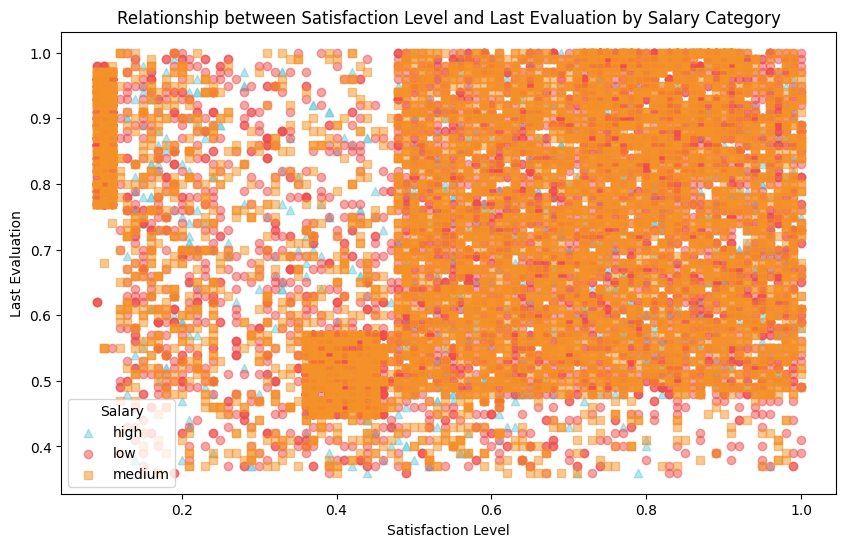

In [20]:
# @title

# Define a dictionary mapping salary categories to markers
salary_markers = {
    'low': 'o',
    'medium': 's',
    'high': '^'
}

# Set the figure size
plt.figure(figsize=(10, 6))

# Iterate over each salary category and plot the corresponding points
for salary, group in employee_eval.groupby('salary'):
    plt.scatter(group['satisfaction_level'], group['last_evaluation'], label=salary, marker=salary_markers[salary], color=salary_colors[salary], alpha=0.5)

# Set labels and title
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.title('Relationship between Satisfaction Level and Last Evaluation by Salary Category')

# Add legend
plt.legend(title='Salary')

# Show the plot
plt.show()

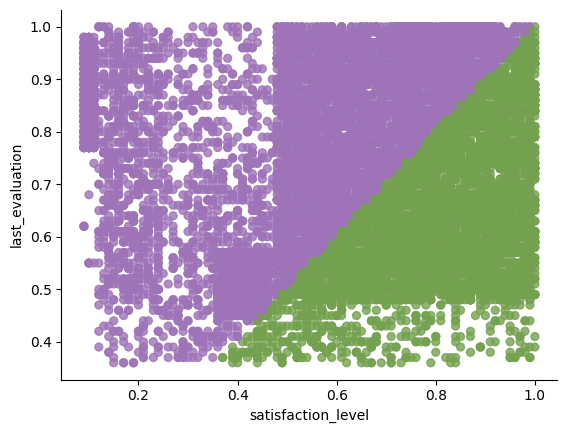

In [21]:
# @title


colors3 = ['#9e73b8' if x < y else '#74a14f' for x, y in zip(employee_eval['satisfaction_level'], employee_eval['last_evaluation'])]
employee_eval.plot(kind='scatter', x='satisfaction_level', y='last_evaluation', s=32, alpha=.8, c=colors3)

# Hide the top and right spines
plt.gca().spines[['top', 'right']].set_visible(False)

plt.show()


>>Each point on the scatter plot represents an employee's satisfaction_level (on the x-axis) and last_evaluation (on the y-axis).
The points are colored based on the conditional statement: green if the satisfaction level is lower than the last evaluation, and purple otherwise.
By looking at the distribution of points and their colors, you can infer the relationship between satisfaction_level and last_evaluation. For example:
If there are many green points (lower satisfaction with higher evaluation), it suggests that there might be dissatisfaction among employees who are evaluated highly.
Conversely, if there are many purple points (higher satisfaction with higher evaluation), it indicates that employees tend to be satisfied with their work when their evaluations are high.
The scatter plot helps visualize the overall pattern and any potential outliers or clusters in the data.
In summary, the scatter plot with conditional coloring provides insight into the relationship between employee satisfaction levels and their last evaluations, allowing you to identify trends and patterns in the data.

In [22]:
# @title
employee_eval.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'quit',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [23]:
# @title
# plt.rcParams['figure.figsize'] = (12,8)

<Figure size 1000x600 with 0 Axes>

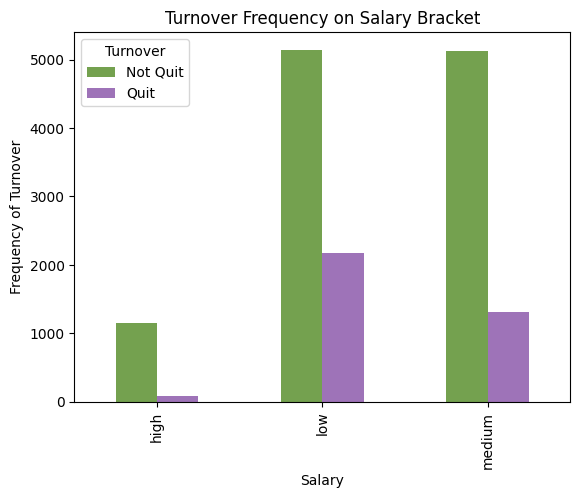

In [24]:
# @title
colors3 = ['#74a14f','#9e73b8']

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a bar chart using crosstab with specified colors
ct = pd.crosstab(employee_eval.salary, employee_eval.quit)
ct.plot(kind='bar', color=colors3)

# Set labels and title
plt.title('Turnover Frequency on Salary Bracket')
plt.xlabel('Salary')
plt.ylabel('Frequency of Turnover')

# Add legend
plt.legend(['Not Quit', 'Quit'], title='Turnover')

# Show the plot
plt.show()

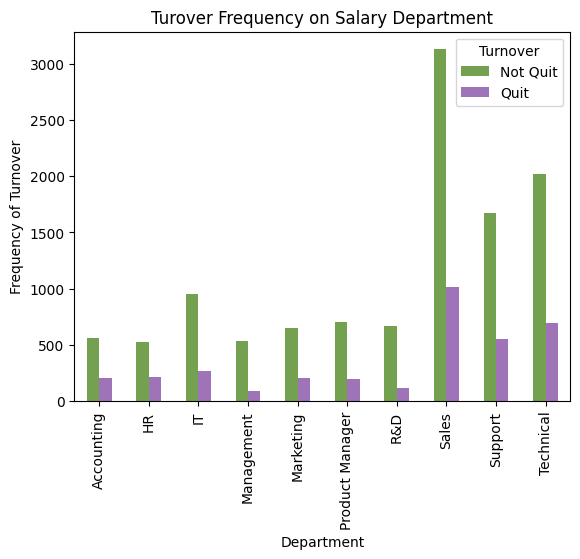

In [25]:
# @title
#colors3 = ['#74a14f','#9e73b8']
pd.crosstab(employee_eval.department, employee_eval.quit).plot(kind='bar',color=colors3)
plt.title('Turover Frequency on Salary Department')
plt.xlabel('Department')
plt.ylabel('Frequency of Turnover')
# Add legend
plt.legend(['Not Quit', 'Quit'], title='Turnover')
plt.show()

categorizing the variables.

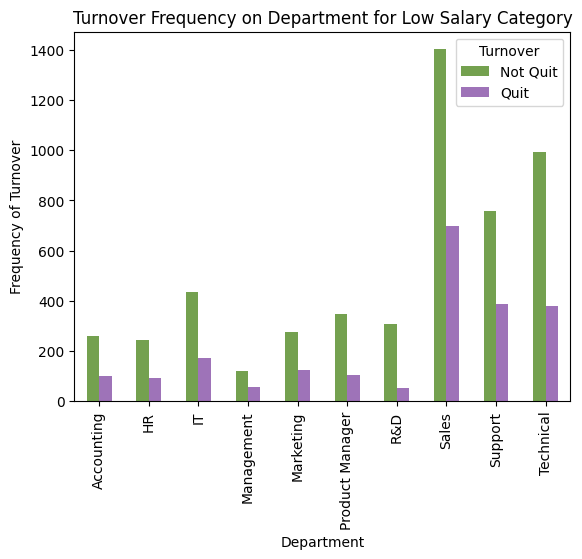

In [26]:
# @title
# Filter the data to include only the rows where the salary category is 'low'
employee_eval_low_salary = employee_eval[employee_eval['salary'] == 'low']

# Create the bar chart using crosstab with specified colors for the 'low' salary category
pd.crosstab(employee_eval_low_salary.department, employee_eval_low_salary.quit).plot(kind='bar', color=colors3)

# Set title and labels
plt.title('Turnover Frequency on Department for Low Salary Category')
plt.xlabel('Department')
plt.ylabel('Frequency of Turnover')

# Add legend
plt.legend(['Not Quit', 'Quit'], title='Turnover')

# Show the plot
plt.show()

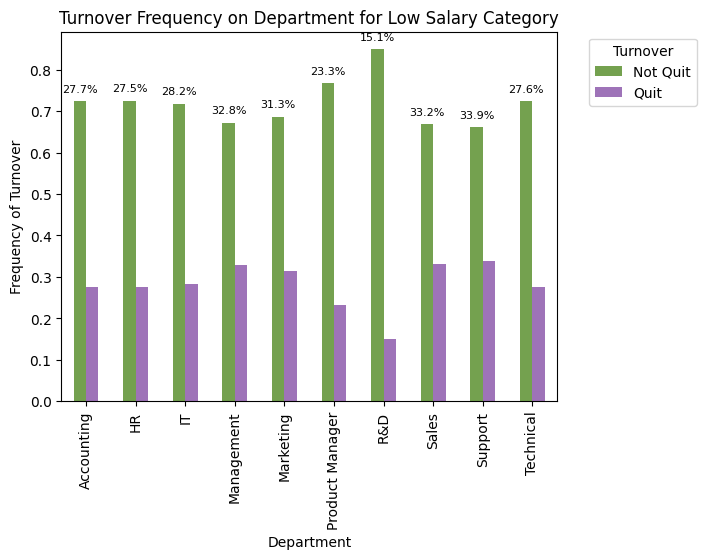

In [27]:
# @title
# Filter the data to include only the rows where the salary category is 'low'
employee_eval_low_salary = employee_eval[employee_eval['salary'] == 'low']

# Calculate the turnover frequency for 'low' salary category by department
turnover_by_department = pd.crosstab(employee_eval_low_salary['department'], employee_eval_low_salary['quit'], normalize='index')

# Calculate the total number of employees and the number of employees who quit by department
total_by_department = employee_eval_low_salary.groupby('department').size()
quit_by_department = employee_eval_low_salary.groupby('department')['quit'].sum()

# Calculate the percentage of employees quitting relative to the total number of employees within each department
percent_quit = (quit_by_department / total_by_department) * 100

# Create the bar chart using crosstab with specified colors for the 'low' salary category
ax = turnover_by_department.plot(kind='bar', color=colors3)

# Set title and labels
plt.title('Turnover Frequency on Department for Low Salary Category')
plt.xlabel('Department')
plt.ylabel('Frequency of Turnover')

# Add legend outside the plot to the right
ax.legend(['Not Quit', 'Quit'], title='Turnover', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add labels for percentage of employees quitting
for department, p in zip(percent_quit.index, ax.patches):
    height = p.get_height()
    # Add annotation with percentage of employees quitting
    ax.annotate(f'{percent_quit[department]:.1f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=8, color='black',
                xytext=(0, 5), textcoords='offset points')

# Show the plot
plt.show()

The bars represent the turnover frequency for each department in the 'low' salary category, and the annotations display the percentage of employees quitting within each department.

In [28]:
# @title


In [29]:
# @title
print(f'{percent_quit[department]}%', (p.get_x() + p.get_width() / 2.))

27.55102040816326% 8.875


In [30]:
# @title
print(percent_quit)

department
Accounting         27.653631
HR                 27.462687
IT                 28.243021
Management         32.777778
Marketing          31.343284
Product Manager    23.281596
R&D                15.109890
Sales              33.206289
Support            33.944154
Technical          27.551020
dtype: float64


In [31]:
# @title
cat_vars = ['department', 'salary']
for var in cat_vars:
  cat_list = pd.get_dummies(employee_eval[var], prefix=var)
  employee_eval = employee_eval.join(cat_list)

In [32]:
# @title
employee_eval.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department,salary,...,department_Management,department_Marketing,department_Product Manager,department_R&D,department_Sales,department_Support,department_Technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,Sales,low,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,Sales,medium,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,Sales,medium,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,Sales,low,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,Sales,low,...,0,0,0,0,1,0,0,0,1,0


In [44]:
# @title
employee_eval.drop(columns = ['department', 'salary'], axis = 1, inplace = True)

In [34]:
# @title


In [35]:
# @title

# plt.style.use("ggplot")
# plt.rcParams['figure.figsize'] = (10,6)

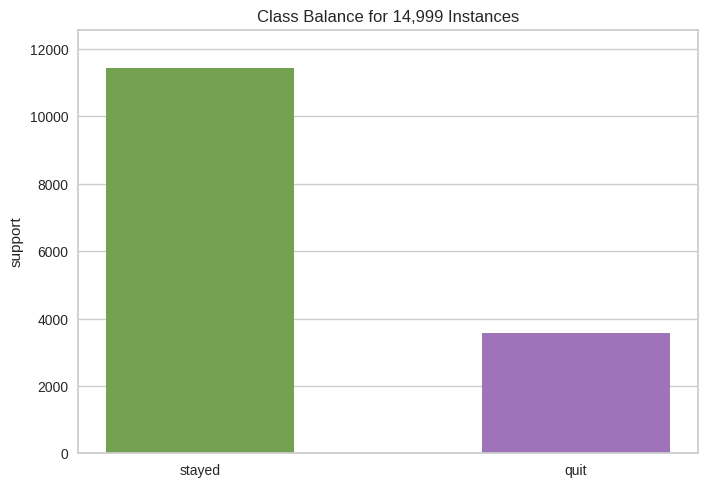

<Axes: title={'center': 'Class Balance for 14,999 Instances'}, ylabel='support'>

In [45]:
# @title
from yellowbrick.target import ClassBalance
colors3 = ['#74a14f', '#9e73b8']
visualizer = ClassBalance(labels=['stayed', 'quit'], colors=colors3)

# Fit the visualizer on your target variable
visualizer.fit(employee_eval.quit)

# Show the visualizer
visualizer.show()

In [46]:
# @title
X = employee_eval.loc[:, employee_eval.columns != 'quit']
y = employee_eval.quit

In [47]:
# @title
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2, stratify = y)

## Build an Interactive Decision Tree Classifier

Supervised learning:
- The inputs are random variables $X = X_1, ..., X_p$;
- The output is a random variable $Y.$


- Data is a finite set $$\mathbb{L}=\{(x_i,y_i)|i=0, ..., N-1\}$$
where $x_i \in X = X_1 \times ... \times X_p$ and $y_i \in y$ are randomly drawn from $P_{X,Y}.$

E.g., $(x_i,y_i)=((\text{salary = low, department = sales, ...}),\text{quit = 1})$

- The goal is to find a model $\varphi_\mathbb{L}: X \mapsto y$ minimizing $$\text{Err}(\varphi_\mathbb{L}) = \mathbb{E}_{X,Y}\{L(Y, \varphi_\mathbb{L}(X))\}.$$


About:

 - Decision trees are non-parametric models which can model arbitrarily complex relations between inputs and outputs, without any a priori assumption

- Decision trees handle numeric and categorical variables

- They implement feature selection, making them robust to noisy features (to an extent)

- Robust to outliers or errors in labels

- Easily interpretable by even non-ML practioners.


#### Decision trees: partitioning the feature space:

- Decision trees generally have low bias but have high variance.

In [61]:
# Decision Tree function
@interact
def plot_tree(crit=['gini', 'entropy'],
              split=['best', 'random'],
              depth=IntSlider(min=1,max=30,value=2, continuous_update=False),
              min_split=IntSlider(min=2,max=5,value=2, continuous_update=False),
              min_leaf=IntSlider(min=1,max=5,value=1, continuous_update=False)):

    estimator_dt = DecisionTreeClassifier(random_state=0, criterion=crit, splitter=split, max_depth=depth,
                                          min_samples_split=min_split, min_samples_leaf=min_leaf)

    estimator_dt.fit(X_train, y_train)

    # Evaluate Decision Tree classifier
    print('Decision Tree Training Accuracy: {:.3f}'.format(accuracy_score(y_train, estimator_dt.predict(X_train))))
    print('Decision Tree Test Accuracy: {:.3f}'.format(accuracy_score(y_test, estimator_dt.predict(X_test))))

    graph = Source(tree.export_graphviz(estimator_dt, out_file=None, feature_names=X_train.columns,
                                        class_names=['stayed', 'quit'], filled=True))

    display(Image(graph.pipe(format='png')))

    return estimator_dt


interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

## Build an Interactive Random Forest Classifier

Although randomization increases bias, it is possible to get a reduction in variance of the ensemble. Random forests are one of the most robust machine learning algorithms for a variety of problems.

- Randomization and averaging lead to a reduction in variance and improve accuracy
- The implementations are parallelizable
- Memory consumption and training time can be reduced by bootstrapping
- Sampling features and not solely sampling examples is crucial to improving accuracy

In [64]:

# Random Forest function
@interact
def plot_tree_rf(crit=['gini', 'entropy'],
                 bootstrap=[True, False],
                 depth=IntSlider(min=1,max=30,value=3, continuous_update=False),
                 forests=IntSlider(min=1,max=200,value=100,continuous_update=False),
                 min_split=IntSlider(min=2,max=5,value=2, continuous_update=False),
                 min_leaf=IntSlider(min=1,max=5,value=1, continuous_update=False)):

    estimator_rf = RandomForestClassifier(random_state=1, criterion=crit, bootstrap=bootstrap,
                                           n_estimators=forests, max_depth=depth,
                                           min_samples_split=min_split,
                                           min_samples_leaf=min_leaf,
                                           n_jobs=-1, verbose=False)
    estimator_rf.fit(X_train, y_train)

    # Evaluate Random Forest classifier
    print('Random Forest Training Accuracy: {:.3f}'.format(accuracy_score(y_train, estimator_rf.predict(X_train))))
    print('Random Forest Test Accuracy: {:.3f}'.format(accuracy_score(y_test, estimator_rf.predict(X_test))))

    num_tree = estimator_rf.estimators_[0]
    print('\Visualizing Tree: ', 0)

    graph = Source(tree.export_graphviz(num_tree, out_file=None, feature_names=X_train.columns,
                                        class_names=['stayed', 'quit'], filled=True))

    display(Image(graph.pipe(format='png')))
    return estimator_rf

    graph = Source(tree.export_graphviz(num_tree, out_file = None, feature_names = X_train.columns,
                                      class_names = ['stayed', 'quit'], filled = True))

    display(Image(employee_eval = graph.pipe(format='png')))
    return estimator

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

## Feature Importance and Evaluation Metrics

In [50]:
# @title
# Define a custom color palette based on kats_palette
custom_palette = kats_palette.colors[1]

# Set the color cycle to use the custom palette
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=custom_palette)

# Now you can use the custom palette in your plotting code
plt.rcParams['figure.figsize'] = (16, 12)


ValueError: Key axes.prop_cycle: '#' does not look like a color arg

<Axes: title={'center': 'Feature Importances of 20 Features using RandomForestClassifier'}, xlabel='relative importance'>

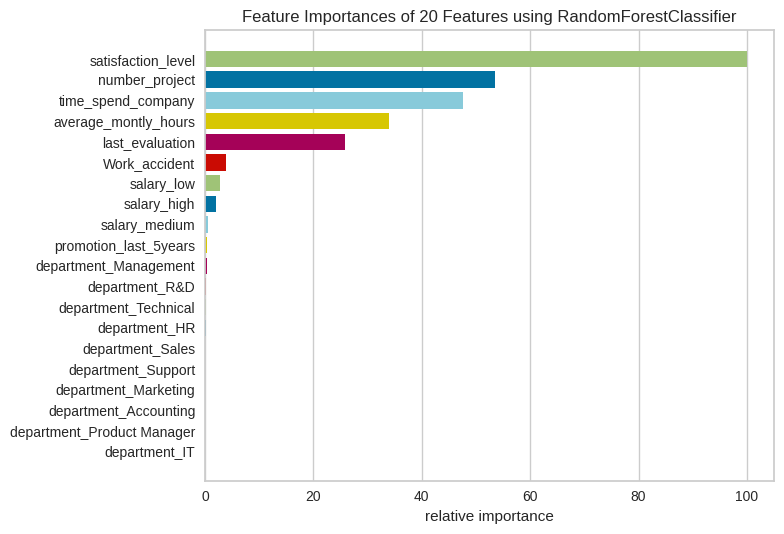

In [51]:
# @title
from yellowbrick.model_selection import FeatureImportances
from sklearn.ensemble import RandomForestClassifier

# Instantiate the RandomForestClassifier
rf = RandomForestClassifier(
    bootstrap=True,  # Corrected parameter
    ccp_alpha=0.0,
    class_weight=None,
    criterion='gini',
    max_depth=5,
    max_features='auto',
    max_leaf_nodes=None,
    max_samples=None,
    min_impurity_decrease=0.0,
    min_samples_leaf=1,
    min_samples_split=2,
    min_weight_fraction_leaf=0.0,
    n_estimators=100,
    n_jobs=-1,
    oob_score=False,
    random_state=1,
    warm_start=False
)

# Instantiate and fit the FeatureImportances visualizer
viz = FeatureImportances(rf)
viz.fit(X_train, y_train)

# Show the feature importances plot and save it to a file
viz.show(outpath="1.png")

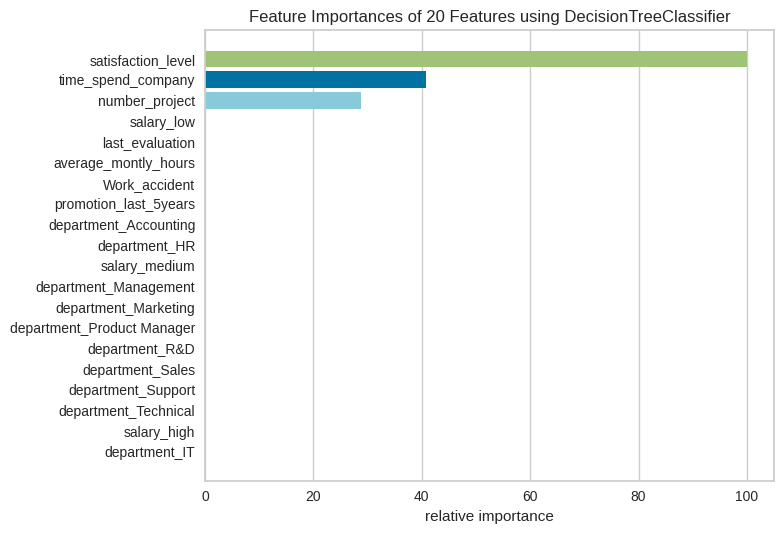

<Axes: title={'center': 'Feature Importances of 20 Features using DecisionTreeClassifier'}, xlabel='relative importance'>

In [52]:
# @title
dt = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0,
                       random_state=0, splitter='best')

viz = FeatureImportances(dt)
viz.fit(X_train, y_train)
viz.show()